In [6]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive')

  PATH_DRIVER = '/content/gdrive/My Drive/'
  DATA_FOLDER = 'AI Dataset Sample/'

  !pip install fastai pydicom kornia --upgrade --quiet

  IN_COLAB = True
except:
  PATH_DRIVER = ''
  DATA_FOLDER = 'data/'
  IN_COLAB = False

In [7]:
import pandas as pd
import numpy as np
import sklearn
import fastai

In [9]:
import pydicom
import matplotlib.pyplot as plt

In [8]:
import os

PATH_PREFIX = os.path.join(PATH_DRIVER, DATA_FOLDER, '')

In [16]:
filename = PATH_PREFIX + '01010000265254/ARIN1J7K5QQ7BeDIUIAP8PM4NVSG41D1DU1S970T5PVP84VGN999B'
dataset = pydicom.dcmread(filename)


Filename.........: data/01010000265254/ARIN1J7K5QQ7BeDIUIAP8PM4NVSG41D1DU1S970T5PVP84VGN999B
Storage type.....: 1.2.840.10008.5.1.4.1.1.1

Patient's name...: 1234, 
Patient id.......: 1234
Modality.........: CR
Study Date.......: 20190117
Image size.......: 1794 x 1144, 4104672 bytes
Pixel spacing....: None
Slice location...: (missing)


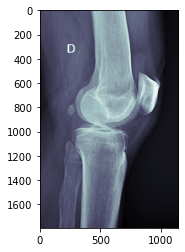

In [17]:
# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [18]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1216.1158.1243.113.1196.184.20190117113311.12
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.403.1.40.2.0.9.0
(0002, 0013) Implementation Version Name         SH: 'RAIMDicom_2.0'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 848
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1216.1158.1

In [3]:
from utils import organize_folders, generate_template

dst_folder = PATH_PREFIX + 'organized'
src_folder = PATH_PREFIX + 'raw'
groups = ['LS', 'CD', 'IF']
subgroup_length = 2

organize_folders(src_folder, dst_folder, groups=groups, subgroup_length=subgroup_length, force_extension='.dcm', debug=False)
generate_template(dst_folder, groups, subgroup_length, excel=True)

In [16]:
import pandas as pd
from fastai.basics import *
from fastai.medical.imaging import *
import gc

# Extract list of files from folder
dicom_folder = PATH_PREFIX + 'organized'
dicom_files = get_files(dicom_folder, extensions='.dcm')

# Transform metadata to DataFrame
df = pd.DataFrame.from_dicoms(dicom_files)

# Remove data from memory
del(dicom_files)
gc.collect();

In [17]:
pd.set_option('max_rows', 50)
df.T

,0,1,2,3,4,5,6,7,8,9
,16,16,16,16,16,16,16,16,16,16
SpecificCharacterSet,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100,ISO_IR 100
ImageType,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED,DERIVED
SOPClassUID,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1,1.2.840.10008.5.1.4.1.1.1
SOPInstanceUID,1216.1158.1243.113.1196.184.20190117113311.11,1216.1158.1243.113.1196.184.20190326143920.13,1216.1158.1243.113.1196.184.20190130113155.3,1216.1158.1243.113.1196.184.20190304113146.3,1216.1158.1243.113.1196.184.20190129103613.3,1216.1158.1243.113.1196.184.20190215174436.39,1216.1158.1243.113.1196.184.20190305135429.11,1216.1158.1243.113.1196.184.20190220113109.3,1216.1158.1243.113.1196.184.20190314154700.11,1216.1158.1243.113.1196.184.20190226200138.31
...,...,...,...,...,...,...,...,...,...,...
img_min,88,108,124,141,88,136,204,143,82,129
img_max,4051,4044,4047,4002,4046,4039,4028,4074,4054,4034
img_mean,1313.57,1445.9,1209.44,1412.97,1333.04,1524.69,1136.37,1383.55,1427.68,1575.75
img_std,925.985,959.274,905.58,869.146,969.833,959.375,826.035,947.756,966.333,956.061


In [13]:
repr_flds = ['BitsStored','PixelRepresentation']
df.pivot_table(values=['img_mean','img_max','img_min','PatientID'], index=repr_flds,
                   aggfunc={'img_mean':'mean','img_max':'max','img_min':'min','PatientID':'count'})

,,PatientID,img_max,img_mean,img_min
BitsStored,PixelRepresentation,,,,
12,0,10,4074,1376.296131,82


In [14]:
df.pivot_table(values=['WindowCenter','WindowWidth', 'RescaleIntercept', 'RescaleSlope'], index=repr_flds,
                   aggfunc={'mean','max','min','std','median'})

RescaleIntercept                        \
                                            max mean median  min  std   
BitsStored PixelRepresentation                                          
12         0                                0.0  0.0    0.0  0.0  0.0   

                               RescaleSlope                        \
                                        max mean median  min  std   
BitsStored PixelRepresentation                                      
12         0                            1.0  1.0    1.0  1.0  0.0   

                               WindowCenter                               \
                                        max    mean  median     min  std   
BitsStored PixelRepresentation                                             
12         0                         2048.0  2048.0  2048.0  2048.0  0.0   

                               WindowWidth                               
                                       max    mean  median     min  std  
BitsStored PixelRepresentation                                           
12         0                        4096.0  4096.0  4096.0  4096.0  0.0

In [18]:
dcms = path.ls(10).map(dcmread)

1 frame per file
1 frame per file


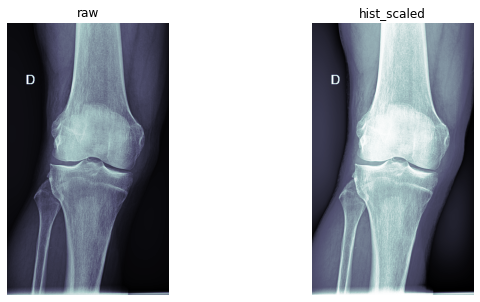

In [19]:
dcm = dcms[0]
scales = False, True
titles = 'raw','hist_scaled'
for s,a,t in zip(scales, subplots(1,2,imsize=5)[1].flat, titles):
    dcm.show(scale=s, ax=a, title=t)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

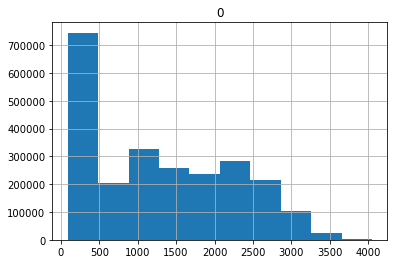

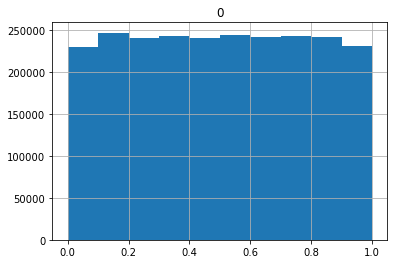

In [20]:
pd.DataFrame(dcm.pixel_array.reshape(-1)).hist()
pd.DataFrame(dcm.hist_scaled().reshape(-1)).hist()

In [114]:
from torch.utils.data import Dataset, DataLoader
# from torchvision.utils import save_image
from fastai.vision.augment import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
from skimage.transform import resize as sk_resize

import torchvision.transforms as tfms

import random

class DCMPreprocessDataset(Dataset):
    """ Dataset class for DCM preprocessing """

    def __init__(self, fnames, resize=None, padding_to_square=True, bins=None):
        self.fnames = fnames
        self.resize = resize
        self.padding_to_square = padding_to_square
        self.bins = bins

    def __len__(self):
        return len(self.fnames)

    def __getitem__(self,  idx):
        """ Get sample after reading from DCM file, scale it and applying the transformations """
        if torch.is_tensor(idx):
            idx = idx.tolist()

        dcm = fnames[idx].dcmread()
        sample = dcm.scaled_px
        if self.bins is not None:
            sample = sample.hist_scaled(brks=self.bins)

        if self.padding_to_square or self.resize is not None:
            transform = [tfms.ToPILImage()]
            # sample = PILImage.create(sample)
            # transform = []

            if self.padding_to_square:
                # Prepare padding transformation to make square image
                x, y = sample.size()
                pad_to = max(x, y)
                extra_width = 0 if (pad_to - y) % 2 else 1
                extra_height = 0 if (pad_to - x) % 2 else 1
                padding = ((pad_to - y) // 2, (pad_to - x) // 2, (pad_to - y) // 2 + extra_width, (pad_to - x) // 2 + extra_height)

                transform += [tfms.Pad(padding=padding, fill=0, padding_mode='constant')]
                # transform += [CropPad(size=pad_to)] # Pending release of issue https://github.com/pytorch/vision/pull/2515

            if self.resize is not None:
                # transform += [Resize(size=self.resize)]
                transform += [tfms.Resize(size=self.resize)]

            sample = tfms.Compose(transform)(sample)
            # for tfms in transform:
            #     sample = tfms(sample)

        return sample

    def get_fname(self, idx):
        """ Get the filenames """

        if torch.is_tensor(idx):
            idx = idx.tolist()

        return fnames[idx].name


    def init_bins(self, n_samples=None):
        """ Initialize bins to equally distribute the histogram of the dataset """

        # Select randomly n_samples
        if n_samples is None:
            fnames_sample = self.fnames.copy()
            random.shuffle(fnames_sample)
            fnames_sample = fnames_sample[:n_samples]
        else:
            fnames_sample = self.fnames
        
        # Extract DCMs
        dcms = fnames_sample.map(dcmread)

        # Resize all images to the same size as the smallest one
        resize = min(dcms.attrgot('scaled_px').map(lambda x: x.size()))
        
        # Extract bins from scaled and resized samples
        samples = torch.stack(tuple([torch.from_numpy(sk_resize(dcm.scaled_px, resize)) for dcm in dcms]))
        self.bins = samples.freqhist_bins()

        return self.bins

    def save(self, dst_folder, extension='png'):
        for idx, data in enumerate(dataset):
            # Create the destination folder if not exists
            if not os.path.exists(dst_folder):
                os.makedirs(dst_folder)

            filename, _ = os.path.splitext(self.get_fname(idx))
            data.save(f'{dst_folder}/{filename}.{extension}', format=extension, compress_level=0 if extension.lower()=='png' else None)
            # save_image(data, f'{dst_folder}/{filename}.{extension}')

In [120]:
src_folder = PATH_PREFIX + 'organized'
dst_folder = PATH_PREFIX + 'preprocess'
n_samples = 10 # None

fnames = get_files(src_folder, extensions='.dcm')

dataset = DCMPreprocessDataset(fnames=fnames, padding_to_square=False, resize=512)
# bins = dataset.init_bins(n_samples=n_samples)
dataset.bins = bins

dataset.save(dst_folder)

In [5]:
from utils import concat_templates

src_folder = PATH_PREFIX + 'organized'
dst_folder = PATH_PREFIX + 'preprocess'

df = concat_templates(src_folder, excel=True)
df.to_excel(
    os.path.join(dst_folder, 'all.xls'),
    index=False
)

In [1]:
import pandas as pd

dst_folder = PATH_PREFIX + 'preprocess'

df = pd.read_excel(os.path.join(dst_folder, 'all.xls'), dtype={'ID':'string','Target':'string'})

In [4]:
from fastai.data.block import *
from fastai.vision.data import *
from fastai.vision.augment import *
from fastai.data.transforms import *

src_folder = PATH_PREFIX + 'preprocess'

dls = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=ColReader('ID', pref=src_folder+'/', suff='.png'), 
    get_y=ColReader('Target'),
    splitter=RandomSplitter(),
    item_tfms=Resize(512),
    batch_tfms=[*aug_transforms()],
).dataloaders(df[['ID','Target']], bs=5)

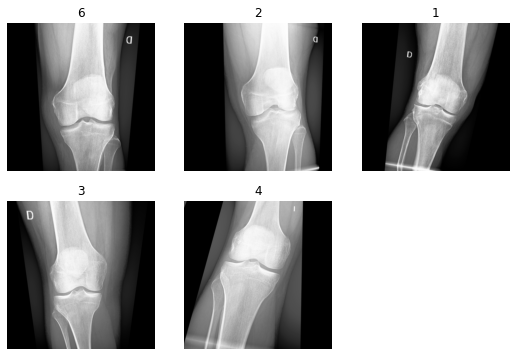

In [5]:
dls.show_batch()